In [1]:
#Importação de bibliotacas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando ps CSV com pandas
pilotos = pd.read_csv('./bases/drivers.csv')
piloto_classificacoes = pd.read_csv('./bases/driver_standings.csv')
corridas = pd.read_csv('./bases/races.csv')
sprint_resultados = pd.read_csv('./bases/sprint_results.csv')
circuitos = pd.read_csv('./bases/circuits.csv')
tempo_por_volta = pd.read_csv('./bases/lap_times.csv')
parada_boxes = pd.read_csv('./bases/pit_stops.csv')
qualificacao = pd.read_csv('./bases/qualifying.csv')
resultados = pd.read_csv('./bases/results.csv')
status = pd.read_csv('./bases/status.csv')
temporadas = pd.read_csv('./bases/seasons.csv')
construtores = pd.read_csv('./bases/constructors.csv')
construtor_classificacoes = pd.read_csv('./bases/constructor_standings.csv')
construtor_resultados = pd.read_csv('./bases/constructor_results.csv')


## Tratamento de dados/Limpeza
#Tabelas a serem tratadas: races, tb_circuts, laptimes, constructor satadings/results

### T/L tabela RACES (CORRIDAS)

Comentários: Deletado coluna URL e substituido valores ("\N") para NULL com (np.nan).
Talvez limpeza dos "fps" free pratice

#### Alterações pré-determinadas:

In [3]:
#Colocando as colunas em PT_BR
corridas.columns = ['corrida_id', 'ano', 'rodada', 'circuito_id', 'nome', 'data','hora','url','fp1_data','fp1_hora','fp2_data','fp2_hora','fp3_data','fp3_hora','quali_data','quali_hora','sprint_data','sprint_hora']

In [4]:
#Deletando colunas que não precisam

#DROP COLUNA URL
corridas = corridas.drop('url', axis=1)

#### Alterações de type nas colunas e nulls

In [5]:
#Colocando os valores "\n" COMO None
corridas = corridas.replace('\\N', np.nan)

In [6]:
#Transformando em date, pois está em object
corridas['data'] = pd.to_datetime(corridas['data'])
corridas['fp1_data'] = pd.to_datetime(corridas['fp1_data'])
corridas['fp2_data'] = pd.to_datetime(corridas['fp2_data'])
corridas['fp3_data'] = pd.to_datetime(corridas['fp3_data'])
corridas['quali_data'] = pd.to_datetime(corridas['quali_data'])
corridas['sprint_data'] = pd.to_datetime(corridas['sprint_data'])

In [7]:
#Transformando em String
corridas['nome'] = corridas['nome'].astype(pd.StringDtype())

In [8]:
#Transformando em DateTime
corridas['hora'] = pd.to_datetime(corridas['hora'], format='%H:%M:%S')
corridas['fp1_hora'] = pd.to_datetime(corridas['fp1_hora'], format='%H:%M:%S')
corridas['fp2_hora'] = pd.to_datetime(corridas['fp2_hora'], format='%H:%M:%S')
corridas['fp3_hora'] = pd.to_datetime(corridas['fp3_hora'], format='%H:%M:%S')
corridas['quali_hora'] = pd.to_datetime(corridas['quali_hora'], format='%H:%M:%S')
corridas['sprint_hora'] = pd.to_datetime(corridas['sprint_hora'], format='%H:%M:%S')

In [9]:
#retorna o número de valores ausentes para cada coluna.
corridas.isna().sum()

corrida_id        0
ano               0
rodada            0
circuito_id       0
nome              0
data              0
hora            731
fp1_data       1035
fp1_hora       1057
fp2_data       1035
fp2_hora       1057
fp3_data       1047
fp3_hora       1066
quali_data     1035
quali_hora     1057
sprint_data    1089
sprint_hora    1092
dtype: int64

In [10]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Corridas:", perc_na(corridas)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Corridas:,60.378266


#### Informações Finais

In [11]:
#Informações
corridas.columns
corridas.shape
corridas.dtypes

print("Descricao: ")
corridas.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
corridas.info()
print("\n")


print("Dimensoes: ")
print(corridas.shape)
print("\n")

corridas.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   corrida_id   1101 non-null   int64         
 1   ano          1101 non-null   int64         
 2   rodada       1101 non-null   int64         
 3   circuito_id  1101 non-null   int64         
 4   nome         1101 non-null   string        
 5   data         1101 non-null   datetime64[ns]
 6   hora         370 non-null    datetime64[ns]
 7   fp1_data     66 non-null     datetime64[ns]
 8   fp1_hora     44 non-null     datetime64[ns]
 9   fp2_data     66 non-null     datetime64[ns]
 10  fp2_hora     44 non-null     datetime64[ns]
 11  fp3_data     54 non-null     datetime64[ns]
 12  fp3_hora     35 non-null     datetime64[ns]
 13  quali_data   66 non-null     datetime64[ns]
 14  quali_hora   44 non-null     datetime64[ns]
 15  sprint_data  12 non-null   

,corrida_id,ano,rodada,circuito_id,nome,data,hora,fp1_data,fp1_hora,fp2_data,fp2_hora,fp3_data,fp3_hora,quali_data,quali_hora,sprint_data,sprint_hora
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,1900-01-01 09:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,1900-01-01 07:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,1900-01-01 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,1900-01-01 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


### T/L tabela CIRCUITS (CIRCUITOS):

Comentários: Remoção de URL e tratamento de tipos e nulls.

#### Informações inicias

In [13]:
#Informações 
circuitos.columns
circuitos.shape
circuitos.dtypes

print("Descricao: ")
circuitos.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
circuitos.info()
print("\n")


print("Dimensoes: ")
print(circuitos.shape)
print("\n")

circuitos.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


Dimensoes: 
(77, 9)




,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


#### Alterações pré-determinadas:

In [14]:
#Colocando as colunas em PT_BR
circuitos.columns = ['circuito_id', 'circuito_ref', 'nome', 'localizacao', 'pais', 'lat','lng', 'alt','url']

In [15]:
#Deletando colunas que não precisam

#DROP COLUNA URL
circuitos = circuitos.drop('url', axis=1)

#### Alterações de type nas colunas e nulls

In [16]:
#Colocando os valores "\n" COMO NP.NAN (NONE)
circuitos = circuitos.replace('\\N', np.nan)

In [17]:
#Transformando em String
circuitos['nome'] = circuitos['nome'].astype(pd.StringDtype())
circuitos['circuito_ref'] = circuitos['circuito_ref'].astype(pd.StringDtype())
circuitos['pais'] = circuitos['pais'].astype(pd.StringDtype())
circuitos['localizacao'] = circuitos['localizacao'].astype(pd.StringDtype())

In [18]:
#Transformando em INT
circuitos['alt'] = pd.to_numeric(circuitos['alt'])

In [19]:
#retorna o número de valores ausentes para cada coluna.
circuitos.isna().sum()

circuito_id     0
circuito_ref    0
nome            0
localizacao     0
pais            0
lat             0
lng             0
alt             3
dtype: int64

In [20]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Corridas:", perc_na(circuitos)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Corridas:,0.487013


#### Informações finais

In [21]:
#Informações
circuitos.columns
circuitos.shape
circuitos.dtypes

print("Descricao: ")
circuitos.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
circuitos.info()
print("\n")


print("Dimensoes: ")
print(circuitos.shape)
print("\n")

circuitos.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   circuito_id   77 non-null     int64  
 1   circuito_ref  77 non-null     string 
 2   nome          77 non-null     string 
 3   localizacao   77 non-null     string 
 4   pais          77 non-null     string 
 5   lat           77 non-null     float64
 6   lng           77 non-null     float64
 7   alt           74 non-null     float64
dtypes: float64(3), int64(1), string(4)
memory usage: 4.9 KB


Dimensoes: 
(77, 8)




,circuito_id,circuito_ref,nome,localizacao,pais,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0


#### Grafos e Estatisticas

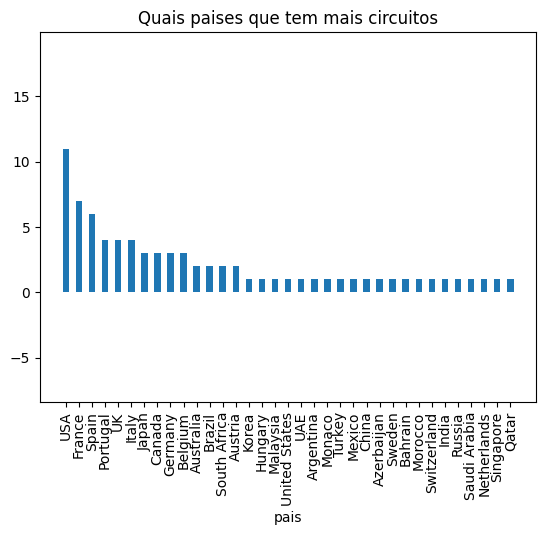

In [22]:
#Distribuição de classificações
count_ratings = circuitos['pais'].value_counts()

# Visualização em um gráfico de pizza
count_ratings.plot(kind='bar')
plt.axis('equal')
plt.title('Quais paises que tem mais circuitos')
plt.show()

### T/L tabela LAPTIMES (tempo_por_volta)

Comentários: Tabela clean, realizado apenas alterações de tipo.

#### Informações Iniciais

In [23]:
#Informações
tempo_por_volta.columns
tempo_por_volta.shape
tempo_por_volta.dtypes

print("Descricao: ")
tempo_por_volta.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
tempo_por_volta.info()
print("\n")


print("Dimensoes: ")
print(tempo_por_volta.shape)
print("\n")

tempo_por_volta.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


Dimensoes: 
(551742, 6)




,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


#### Alterações pré-determinadas:

In [24]:
#Colocando as colunas em PT_BR
tempo_por_volta.columns = ['corrida_id', 'piloto_id', 'volta', 'posicao', 'tempo', 'milisegundos']

#### Alterações de type nas colunas e nulls

In [33]:
#Transformando object (coluna: TEMPO) em datatype

def converter_tempo(tempo):
    try:
        return pd.to_datetime(tempo, format='%H:%M:%S.%f')
    except ValueError:
        try:
            return pd.to_datetime(tempo, format='%M:%S.%f')
        except ValueError:
            raise ValueError("Formato de tempo não reconhecido: {}".format(tempo))

# Aplicando a função de conversão
tempo_por_volta['tempo'] = tempo_por_volta['tempo'].apply(converter_tempo)

# Formatando para MM:SS.SSS
tempo_por_volta['tempo'] = tempo_por_volta['tempo'].dt.strftime('%H:%M:%S.%f').str[:-3]
tempo_por_volta['tempo'] = tempo_por_volta['tempo'].apply(converter_tempo)

In [26]:
#retorna o número de valores ausentes para cada coluna.
tempo_por_volta.isna().sum()

corrida_id      0
piloto_id       0
volta           0
posicao         0
tempo           0
milisegundos    0
dtype: int64

In [27]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Tempo_por_volta:", perc_na(tempo_por_volta)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Tempo_por_volta:,0.0


#### Informações finais

In [103]:
#Informações
tempo_por_volta.columns
tempo_por_volta.shape
tempo_por_volta.dtypes

print("Descricao: ")
tempo_por_volta.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
tempo_por_volta.info()
print("\n")


print("Dimensoes: ")
print(tempo_por_volta.shape)
print("\n")

tempo_por_volta.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   corrida_id    551742 non-null  int64         
 1   piloto_id     551742 non-null  int64         
 2   volta         551742 non-null  int64         
 3   posicao       551742 non-null  int64         
 4   tempo         551742 non-null  datetime64[ns]
 5   milisegundos  551742 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 25.3 MB


Dimensoes: 
(551742, 6)




,corrida_id,piloto_id,volta,posicao,tempo,milisegundos
0,841,20,1,1,1900-01-01 00:01:38.109,98109
1,841,20,2,1,1900-01-01 00:01:33.006,93006
2,841,20,3,1,1900-01-01 00:01:32.713,92713
3,841,20,4,1,1900-01-01 00:01:32.803,92803
4,841,20,5,1,1900-01-01 00:01:32.342,92342


#### Grafos e estatistica

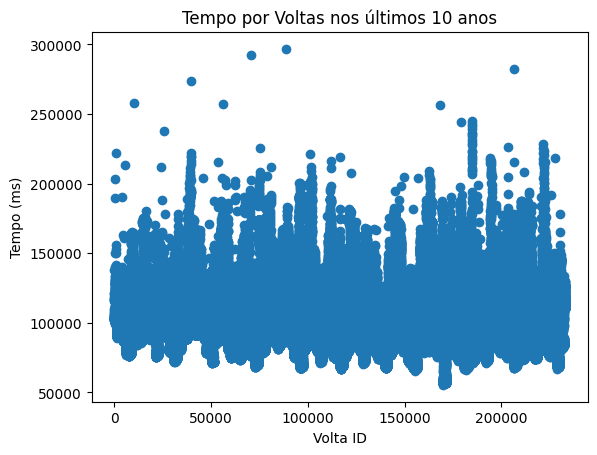

In [101]:
ano = 2023

anos_filtrados = corridas[corridas.ano >= ano - 10]

#Filter down to last ten years of data
voltas_filtradas = tempo_por_volta[tempo_por_volta.corrida_id.isin(anos_filtrados.corrida_id)]
# Filter out extreme outliers
voltas_filtradas = voltas_filtradas[voltas_filtradas.milisegundos <= 300000]

plot_index = [x for x in range(len(voltas_filtradas.milisegundos))]


fig, ax = plt.subplots()

ax.set_xlabel('Volta ID')
ax.set_ylabel('Tempo (ms)')
ax.set_title('Tempo por Voltas nos últimos 10 anos')



plt.scatter(x=plot_index, y=voltas_filtradas.milisegundos)

In [ ]:
data_corridas_volta = pd.merge(corridas, tempo_por_volta, on='corrida_id')
data_corridas_volta = pd.merge(data_corridas_volta, pilotos, on='piloto_id')
media_tempo_volta = data_corridas_volta.groupby(['ano', 'corrida_id'])['milisegundos'].mean().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(x='ano', y='milisegundos', data=media_tempo_volta)
plt.xlabel('Ano')
plt.ylabel('Media tempo volta (ms)')
plt.title('Media de tempo por volta nos ultimos anos')
plt.show()

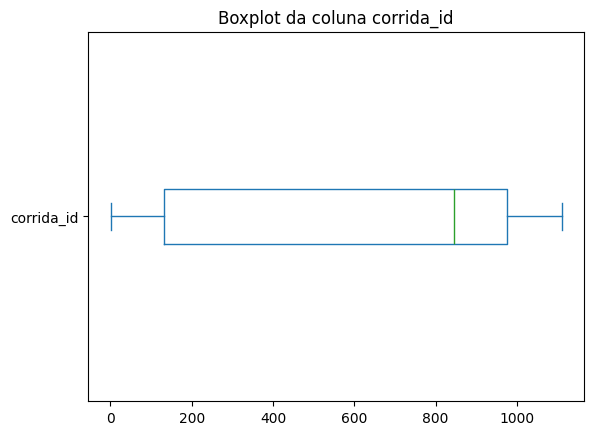

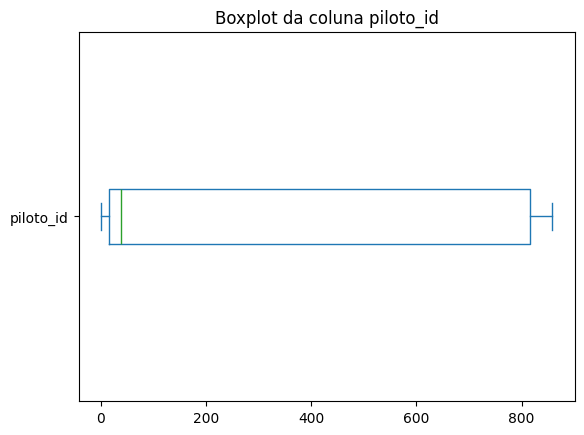

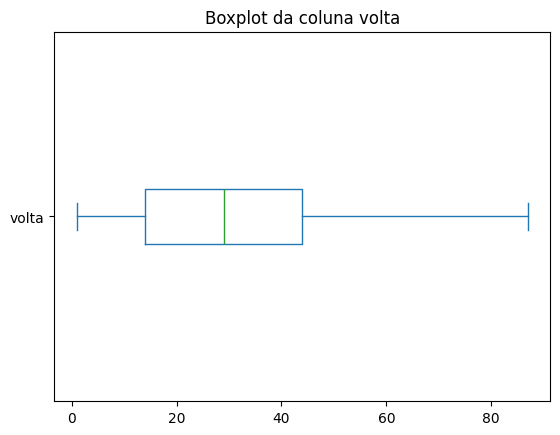

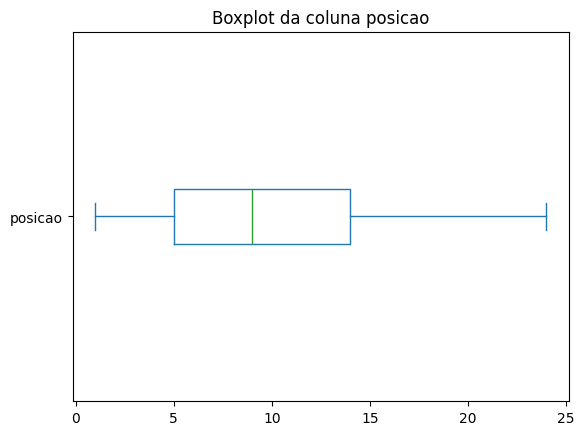

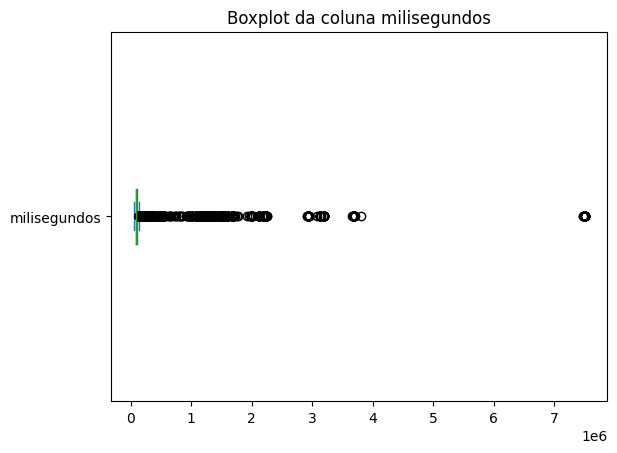

In [75]:
# Crie um boxplot para cada coluna numérica
for coluna in tempo_por_volta.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    tempo_por_volta[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

### T/L tabela CONSTRUCTOR RESULTS (CONSTRUTOR_RESULTADOS):

Comentários: Tabela clean, talvez limpeza no status, pois tem muitos nulls.

#### Informações iniciais

In [35]:
#Informações
construtor_resultados.columns
construtor_resultados.shape
construtor_resultados.dtypes

print("Descricao: ")
construtor_resultados.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
construtor_resultados.info()
print("\n")


print("Dimensoes: ")
print(construtor_resultados.shape)
print("\n")

construtor_resultados.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12290 non-null  int64  
 1   raceId                12290 non-null  int64  
 2   constructorId         12290 non-null  int64  
 3   points                12290 non-null  float64
 4   status                12290 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 480.2+ KB


Dimensoes: 
(12290, 5)




,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


#### Alterações pré-determinadas:

In [36]:
construtor_resultados.columns = ['construtor_resultados_id', 'corrida_id', 'construtor_id', 'pontos', 'status']


#### Alterações de type nas colunas e nulls

In [39]:
#Colocando os valores "\n" COMO None
construtor_resultados = construtor_resultados.replace('\\N', np.nan)

#Transformando em String
construtor_resultados['status'] = construtor_resultados['status'].astype(pd.StringDtype())

In [42]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtor_resultados.columns:
    contagem = construtor_resultados[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
construtor_resultados_id: 0
corrida_id: 0
construtor_id: 0
pontos: 0
status: 12273


#### Informações finais

In [43]:
#Informações
construtor_resultados.columns
construtor_resultados.shape
construtor_resultados.dtypes

print("Descricao: ")
construtor_resultados.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
construtor_resultados.info()
print("\n")


print("Dimensoes: ")
print(construtor_resultados.shape)
print("\n")

construtor_resultados.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   construtor_resultados_id  12290 non-null  int64  
 1   corrida_id                12290 non-null  int64  
 2   construtor_id             12290 non-null  int64  
 3   pontos                    12290 non-null  float64
 4   status                    17 non-null     string 
dtypes: float64(1), int64(3), string(1)
memory usage: 480.2 KB


Dimensoes: 
(12290, 5)




,construtor_resultados_id,corrida_id,construtor_id,pontos,status
0,1,18,1,14.0,<NA>
1,2,18,2,8.0,<NA>
2,3,18,3,9.0,<NA>
3,4,18,4,5.0,<NA>
4,5,18,5,2.0,<NA>


#### Grafos e estatisticas

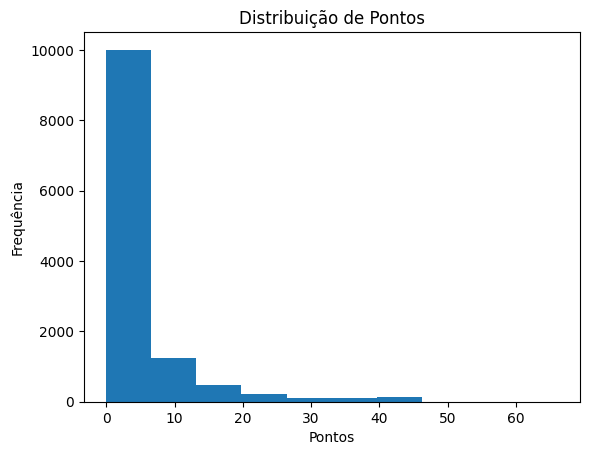

In [49]:
# Histograma das avaliações dos usuários
construtor_resultados['pontos'].plot(kind='hist')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.title('Distribuição de Pontos')
plt.show()

### T/L tabela CONSTRUCTOR_STANDINGS (CONSTUTOR_CLASSIFICACOES)

Comentário: Possui uma coluna "poiscoes_texto", que seria a posicao porem em string. Possivel drop.

#### Informações inicias:

In [50]:
#Informações
construtor_classificacoes.columns
construtor_classificacoes.shape
construtor_classificacoes.dtypes

print("Descricao: ")
construtor_classificacoes.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
construtor_classificacoes.info()
print("\n")


print("Dimensoes: ")
print(construtor_classificacoes.shape)
print("\n")

construtor_classificacoes.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13051 non-null  int64  
 1   raceId                  13051 non-null  int64  
 2   constructorId           13051 non-null  int64  
 3   points                  13051 non-null  float64
 4   position                13051 non-null  int64  
 5   positionText            13051 non-null  object 
 6   wins                    13051 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 713.9+ KB


Dimensoes: 
(13051, 7)




,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


#### Alterações pré-determinadas:


In [51]:
#Colocando as colunas em PT_BR
construtor_classificacoes.columns = ['construtor_classif_id', 'corrida_id', 'construtor_id', 'pontos', 'posicao', 'posicao_texto','vitorias']

#### Alterações de type nas colunas e nulls

In [53]:
#Transformando em String
construtor_classificacoes['posicao_texto'] = construtor_classificacoes['posicao_texto'].astype(pd.StringDtype())

In [55]:
#retorna o número de valores ausentes para cada coluna.
construtor_classificacoes.isna().sum()

construtor_classif_id    0
corrida_id               0
construtor_id            0
pontos                   0
posicao                  0
posicao_texto            0
vitorias                 0
dtype: int64

In [56]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Construtor_Classificacoes:", perc_na(construtor_classificacoes)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Construtor_Classificacoes:,0.0


#### Informações finais

In [61]:
#Informações
construtor_classificacoes.columns
construtor_classificacoes.shape
construtor_classificacoes.dtypes

print("Descricao: ")
construtor_classificacoes.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
construtor_classificacoes.info()
print("\n")


print("Dimensoes: ")
print(construtor_classificacoes.shape)
print("\n")

construtor_classificacoes.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   construtor_classif_id  13051 non-null  int64  
 1   corrida_id             13051 non-null  int64  
 2   construtor_id          13051 non-null  int64  
 3   pontos                 13051 non-null  float64
 4   posicao                13051 non-null  int64  
 5   posicao_texto          13051 non-null  string 
 6   vitorias               13051 non-null  int64  
dtypes: float64(1), int64(5), string(1)
memory usage: 713.9 KB


Dimensoes: 
(13051, 7)




,construtor_classif_id,corrida_id,construtor_id,pontos,posicao,posicao_texto,vitorias
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [68]:
contagem_contrutores = construtor_classificacoes['construtor_id'].value_counts().sort_index()


In [ ]:
melhores_construtores = pd.merge(construtor_classificacoes, construtores, on='construtor_id')
melhores_construtores = melhores_construtores.groupby('nome')['pontos'].sum()
melhores_construtores = melhores_construtores.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
melhores_construtores.plot(kind='bar', color='violet')
plt.xlabel('Times')
plt.ylabel('Total de pontos')
plt.title('TOP 10 Construtores da Historia')
plt.xticks(rotation=45)
plt.show()

In [105]:
## Exportação de dados

#Salvando as tabelas em PT_BR
corridas.to_csv('./bases_br/corridas.csv', index=False)
circuitos.to_csv('./bases_br/circuitos.csv', index=False)
tempo_por_volta.to_csv('./bases_br/tempo_por_volta.csv', index=False)
construtor_resultados.to_csv('./bases_br/construtor_resultados.csv', index=False)
construtor_classificacoes.to_csv('./bases_br/construtor_classificacoes.csv', index=False)